In [8]:
import numpy as np
from DataPreparation import read_data, basic_info, prior_distribution, features_histograms
from DataPreparation import visualize_continuous_data,  visualize_categorical_data
from CovarianceAnalysis import numerical_correlation_matrix, categorical_correlation_matrix, mix_correlation_matrix

### Read the Data

In [9]:
x_train_d, y_train_d = read_data()

# show top 5 rows of the dataset
x_train_d.head()


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport
0,Female,18.000000,1.590000,40.000000,yes,2.000000,1.000000,no,no,1.000000,Frequently,yes,no,0.00000,2.000000,Public_Transportation
1,Female,18.094079,1.723328,50.000000,yes,1.052699,1.000000,Sometimes,no,3.998618,Frequently,no,no,2.00000,1.000000,Public_Transportation
2,Male,17.377131,1.811238,58.830710,yes,2.483979,2.000000,no,no,3.762778,Sometimes,yes,no,2.00000,0.930051,Automobile
3,Female,18.874591,1.533609,41.669346,yes,2.762325,1.304910,Sometimes,no,1.163666,Sometimes,no,no,0.25289,1.001405,Public_Transportation
4,Female,20.147114,1.528011,42.000000,yes,3.000000,1.322669,Sometimes,no,1.000000,Frequently,no,no,0.00000,0.478676,Public_Transportation


### Basic information about the data

In [10]:
basic_info(x_train_d, y_train_d)


Number of samples in the dataset:  1180

Number of features in the dataset:  16

Features in the dataset:                       0
0               Gender
1                  Age
2               Height
3               Weight
4        H_Cal_Consump
5          Veg_Consump
6        Water_Consump
7      Alcohol_Consump
8              Smoking
9           Meal_Count
10  Food_Between_Meals
11            Fam_Hist
12          H_Cal_Burn
13            Phys_Act
14          Time_E_Dev
15           Transport

Number of classes in the dataset:  4


### Investigate Feature Distributions

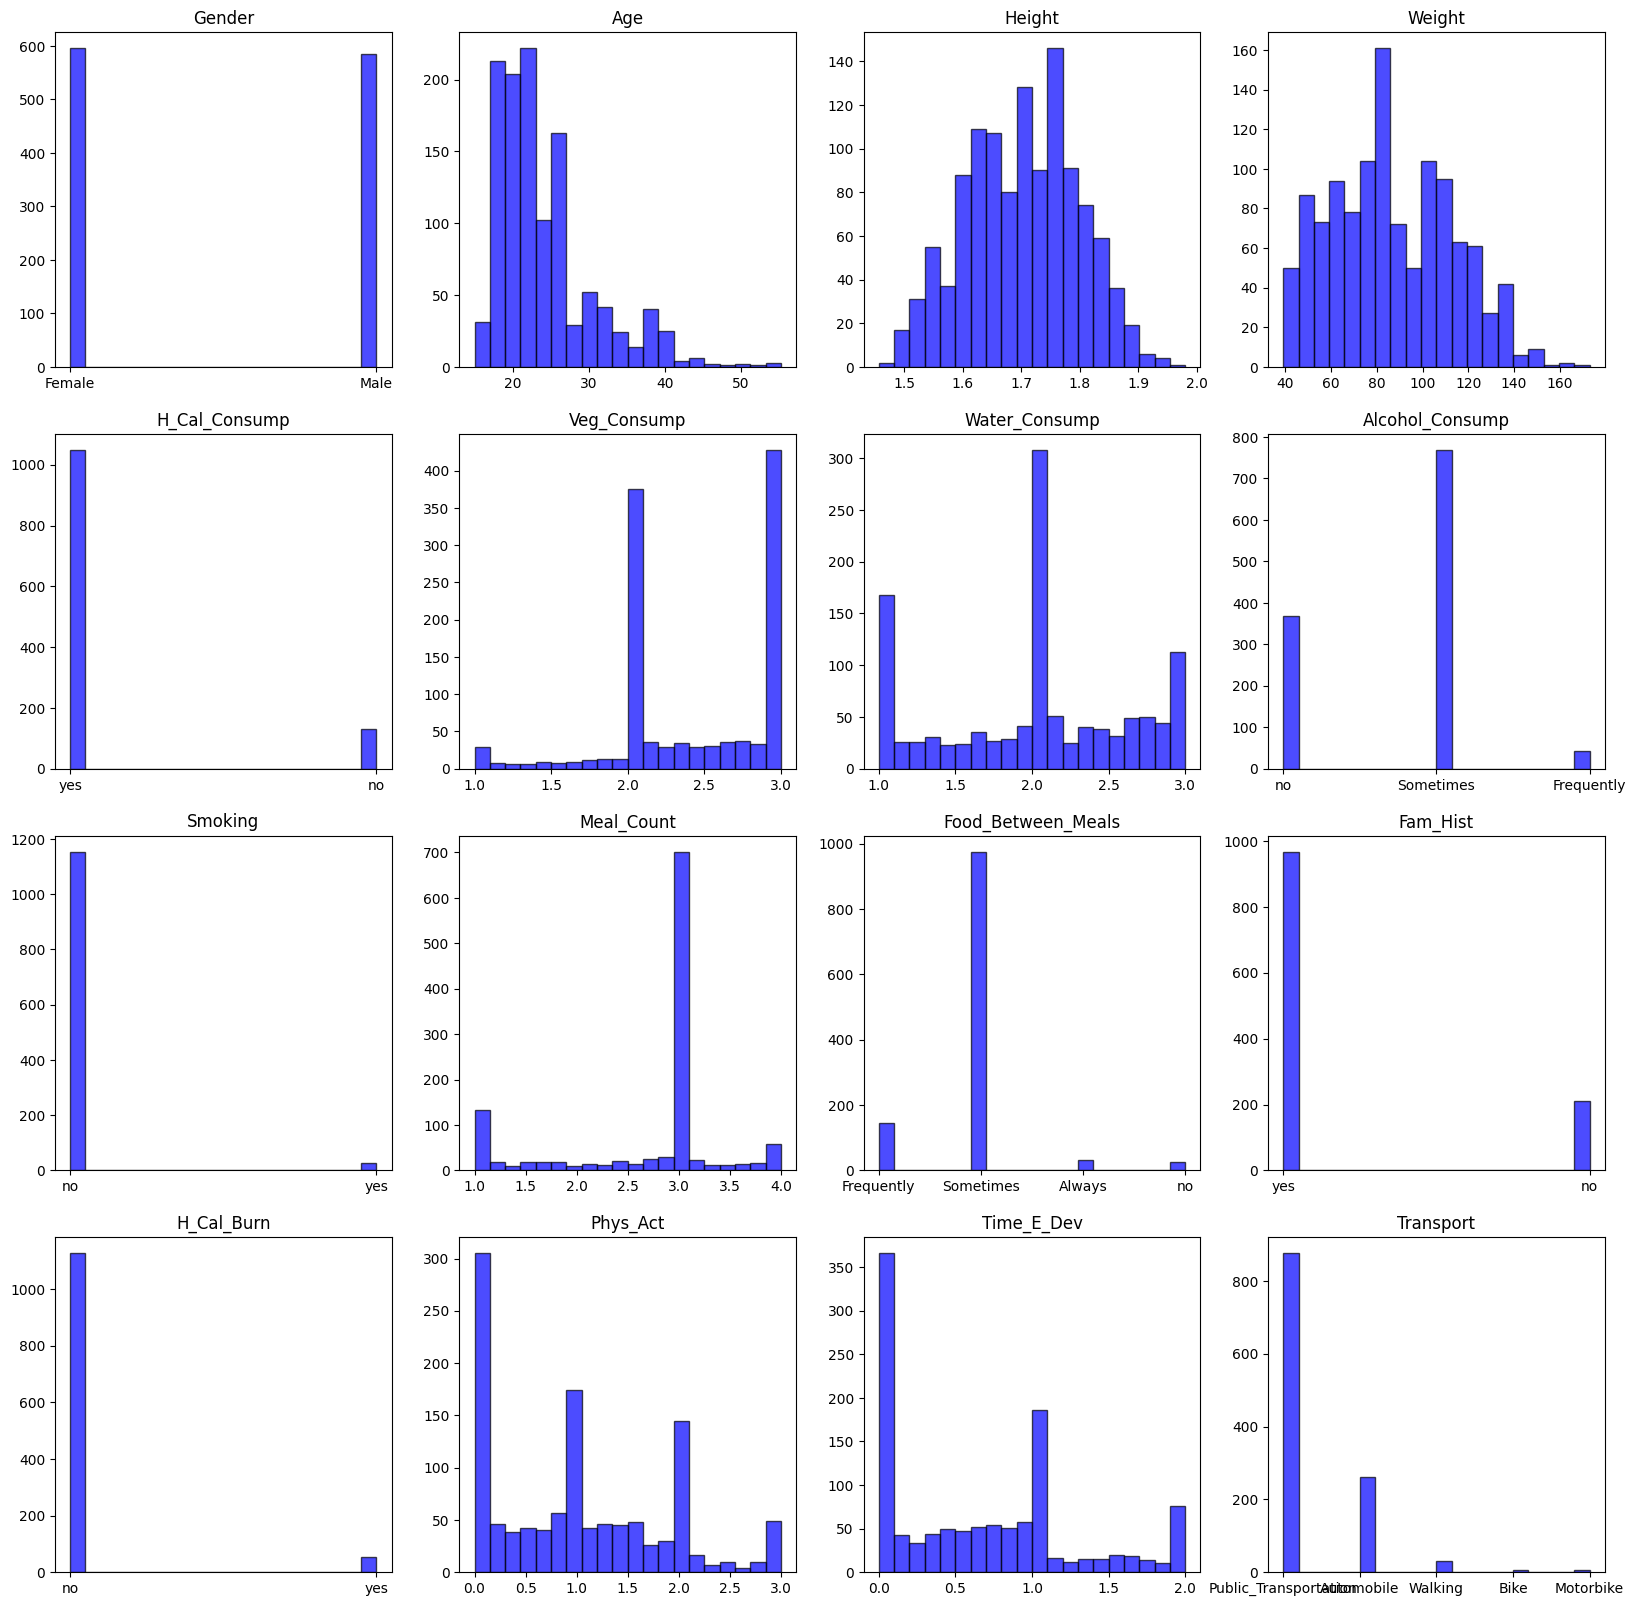


Number of unique values of each feature:

Gender :  2
Age : (numerical)
Height : (numerical)
Weight : (numerical)
H_Cal_Consump :  2
Veg_Consump : (numerical)
Water_Consump : (numerical)
Alcohol_Consump :  3
Smoking :  2
Meal_Count : (numerical)
Food_Between_Meals :  4
Fam_Hist :  2
H_Cal_Burn :  2
Phys_Act : (numerical)
Time_E_Dev : (numerical)
Transport :  5
Number of categorical features:  8
Number of numerical features:  8


In [11]:
features_histograms(x_train_d)

### Investigate Class Imbalance

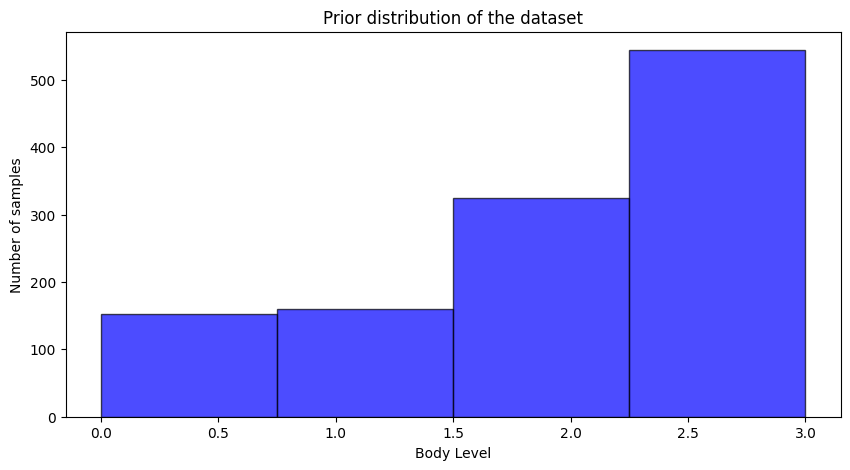


Number of samples in each class:

Class 0 : 152
Class 1 : 160
Class 2 : 324
Class 3 : 544


In [12]:
prior_distribution(y_train_d)

### Analyze potential in the continuous features

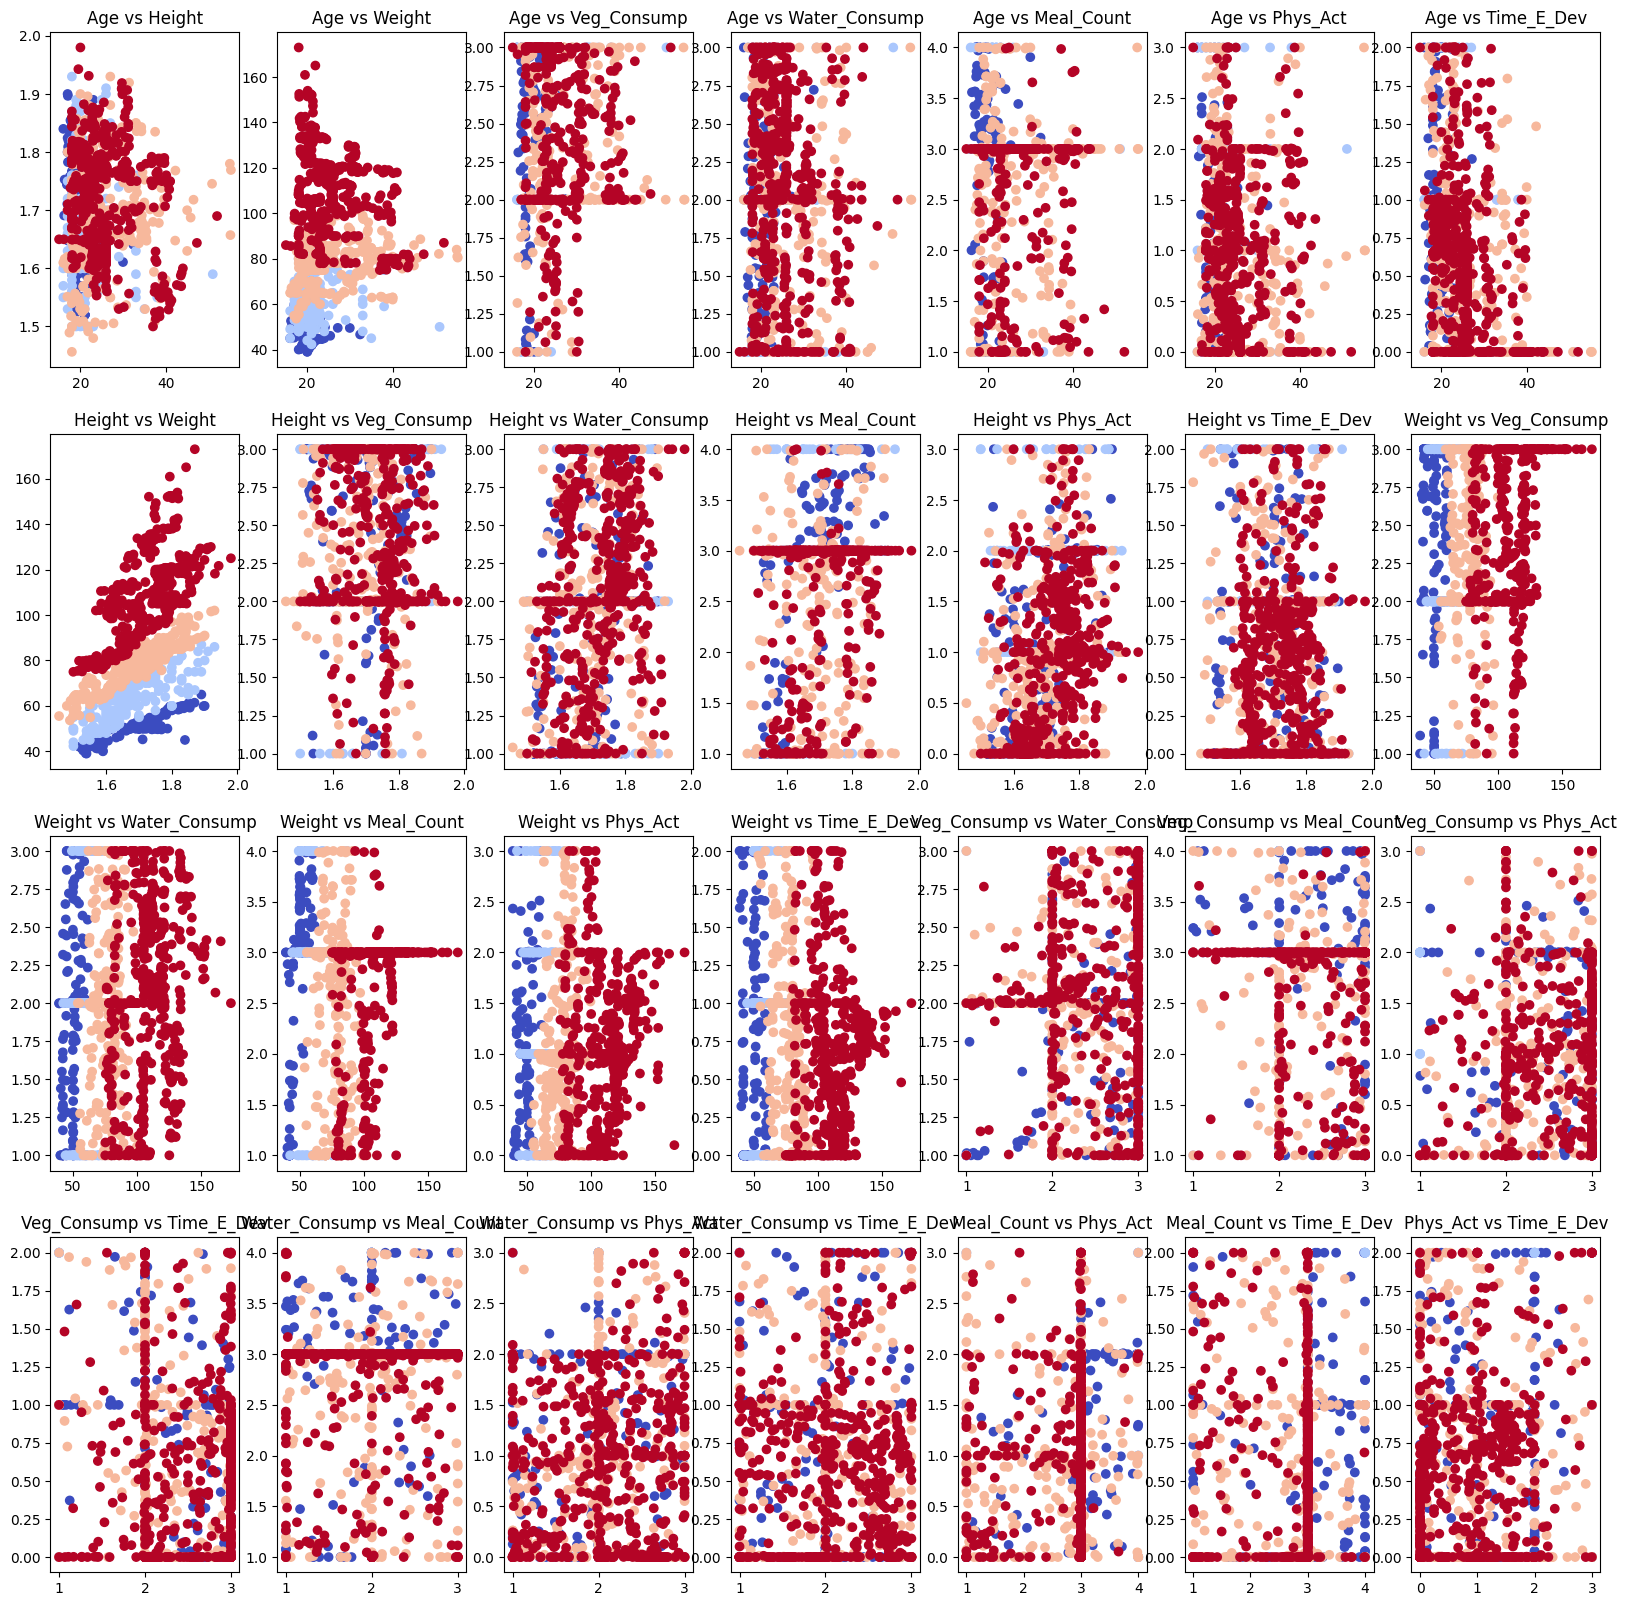

'\nWeights VS. Height is interesting, perhaps. Overall there seem to be potential in making a good classifier.\n'

In [13]:
visualize_continuous_data(x_train_d, y_train_d)
'''
Weights VS. Height is interesting, perhaps. Overall there seem to be potential in making a good classifier.
'''

### Analyze potential in the continuous features

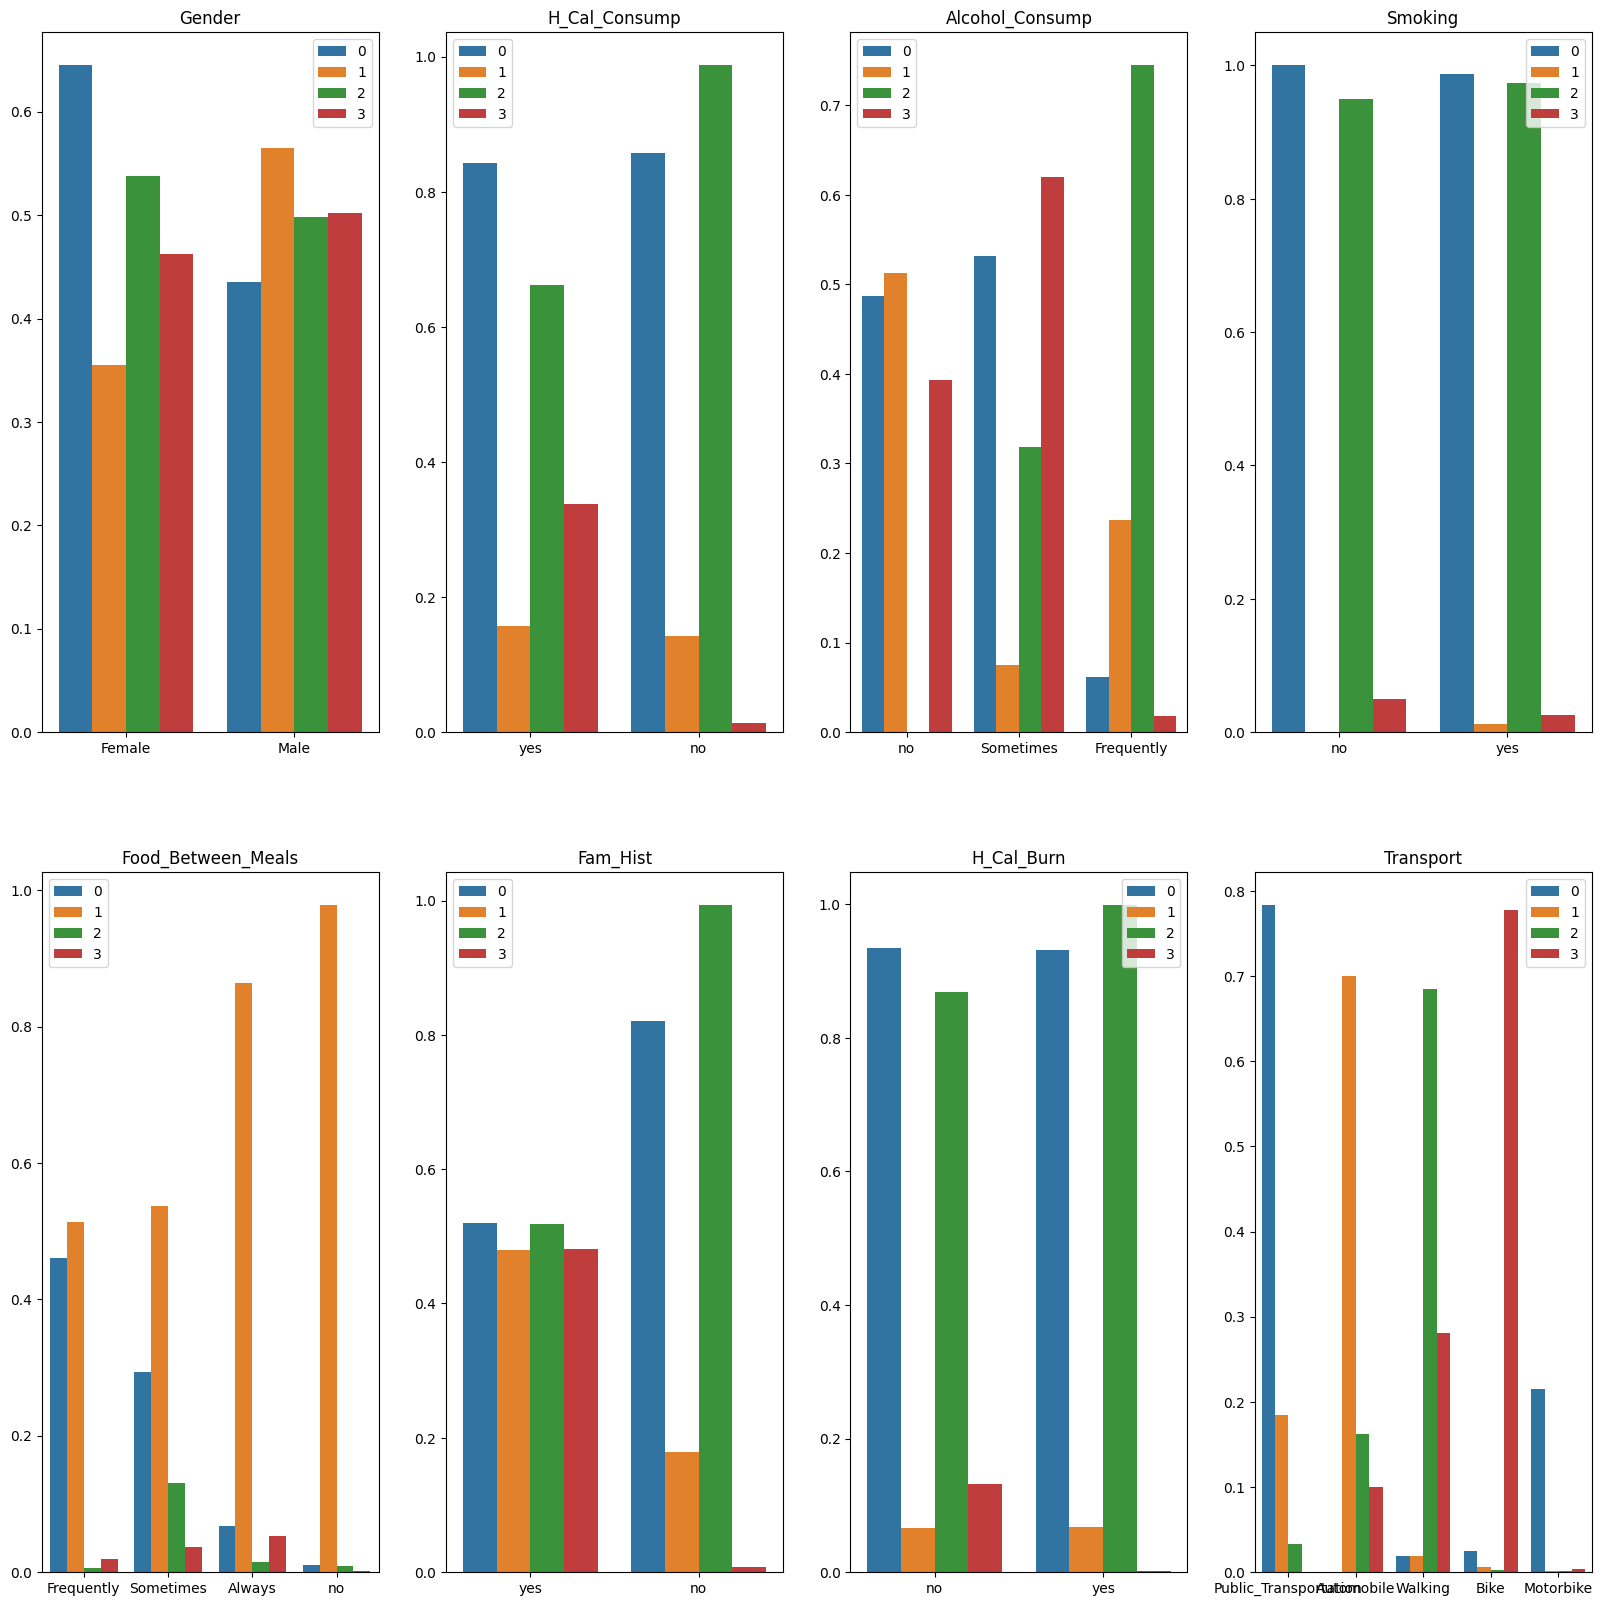

In [14]:
visualize_categorical_data(x_train_d, y_train_d, normalize=True)

### Analyze correlation between continuous features

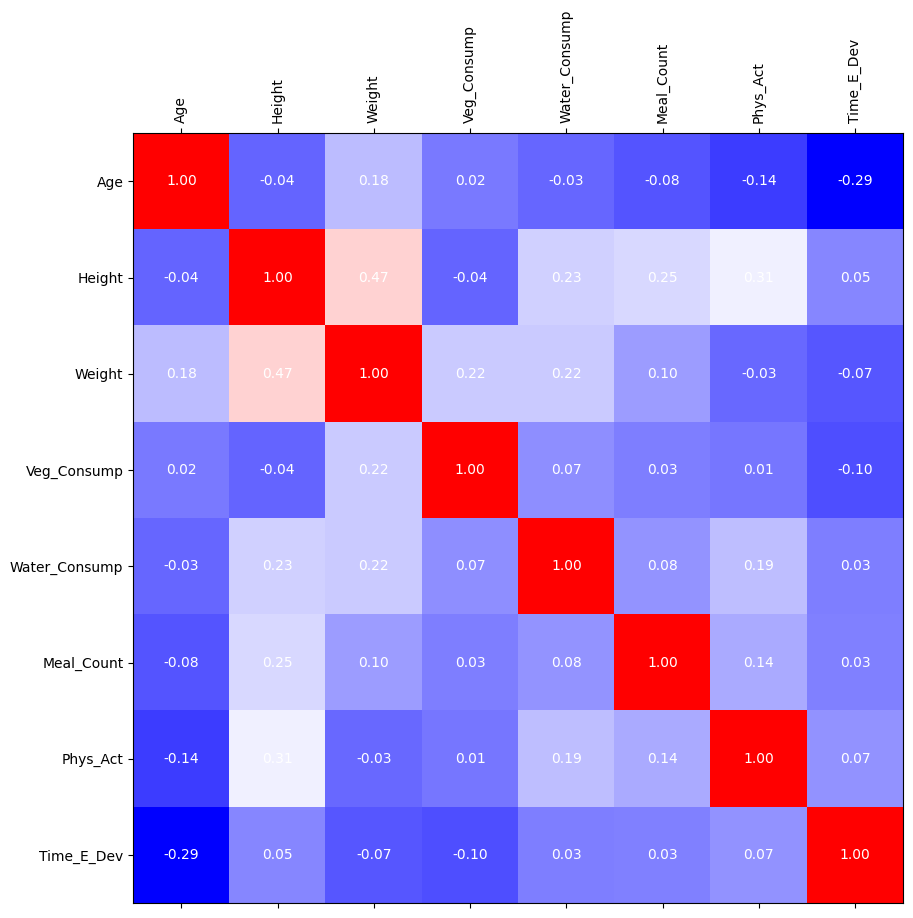

In [15]:
numerical_correlation_matrix(x_train_d)

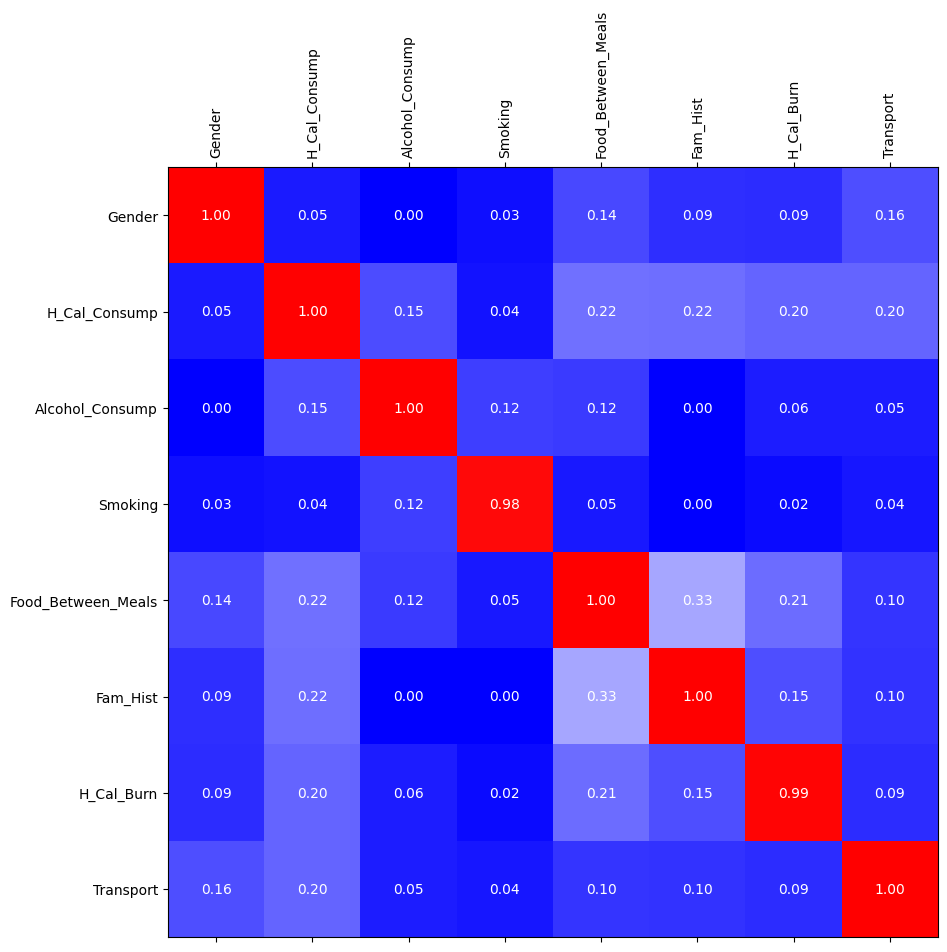

In [16]:
categorical_correlation_matrix(x_train_d)

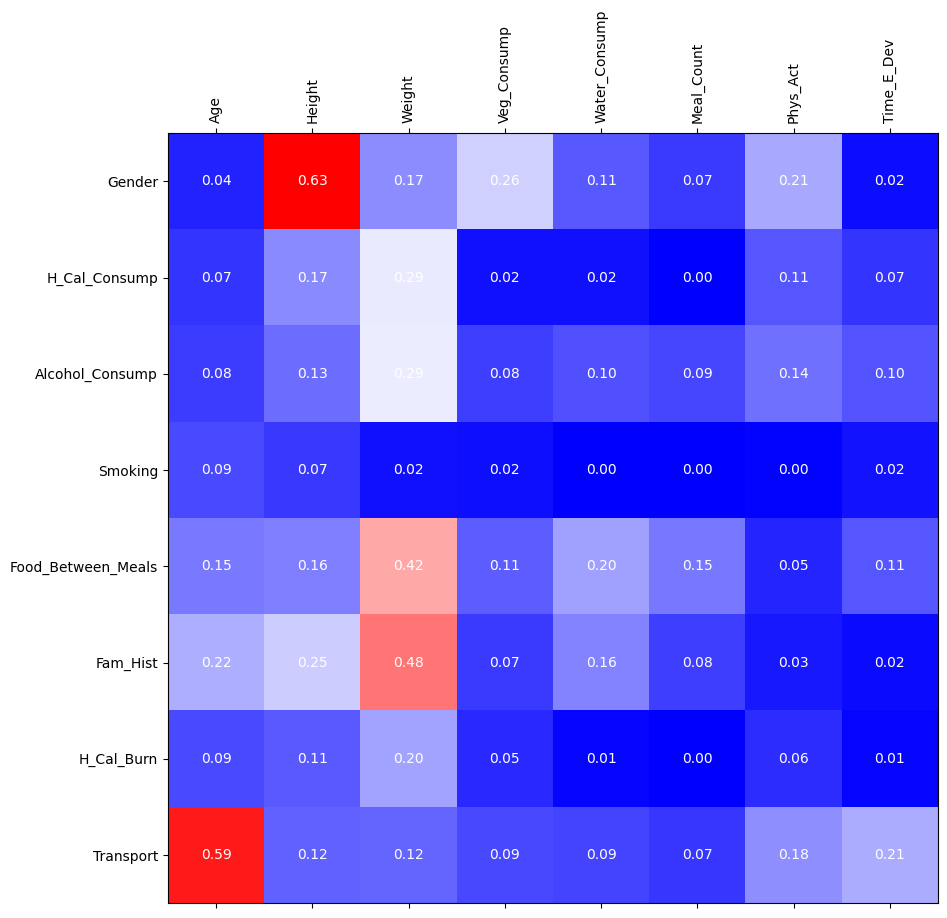

'\nMales seem on average taller than females and older ages perhaps do more transport.\n'

In [17]:
mix_correlation_matrix(x_train_d)
'''
Males seem on average taller than females and older ages perhaps do more transport.
'''

### Validation Set Size

Notice that since the dataset has size $N=1477$ we can write Hoeffding's inequality as follows:

$$P[|E_{out}(g)-E_{test}(g)| \leq \epsilon] \geq 1-2e^{-2N\epsilon^2}$$

If we use validation with a set of size $0.25N$ then with $\epsilon=0.05$ we have 

$$P[|E_{out}(g)-E_{test}(g)| \leq \epsilon] \geq 0.69$$

So we can't be entirely certain of perfect generalization due to the small dataset. We can say that since the final model will be also trained on the $0.2N$ it will be likely better than this. In other words, we expect that the difference between Eout and Etest will be less than $0.05$.


We shall use cross validation for hyperparameters with a set of size $0.25N$ and also hold out a set of size $0.2N$ for final validation.
